# Data Visualization

In [43]:
import numpy as np
import pandas as pd
from sklearn import datasets
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import probscale
from pandas.plotting import parallel_coordinates, radviz
sns.set(color_codes=True)

# Doing a little data wrangling using pandas to setup datasets for visualization
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
labels = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width",]
species = ["Setosa", "Versicolour", "Virginica"]
target = iris.target
target_df = pd.DataFrame(iris.target)
iris_pair_df = iris_df
species_dict = {0: species[0], 1:species[1], 2:species[2]}
iris_pair_df["species"] = target_df
iris_pair_df["species"] = iris_pair_df["species"].map(species_dict)

## Stem and Leaf Plot

In [44]:
def stem(d):
    l, t = np.sort(d.astype(int)), 10
    O = range(l[0] - l[0] % t, l[-1] + 11, t)
    I = np.searchsorted(l, O)
    for e, a, f in zip(I, I[1:], O): print('%3d|' % (f / t), *(l[e:a] - f), sep='')

data = iris.data
stem(10 * data.T[0])

  4|3444566667788888999999
  5|0000000000111111111222234444445555555666666777777778888888999
  6|000000111111222233333333344444445555566777777778889999
  7|0122234677779


## Histogram

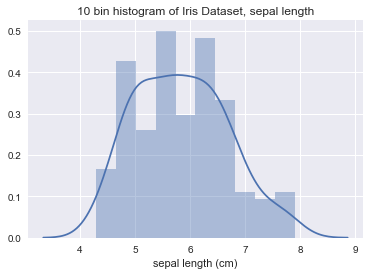

In [45]:
# 10 bin histogram
ax = sns.distplot(iris_df["sepal length (cm)"], bins=10)
ax.set_title("10 bin histogram of Iris Dataset, sepal length")
plt.show()

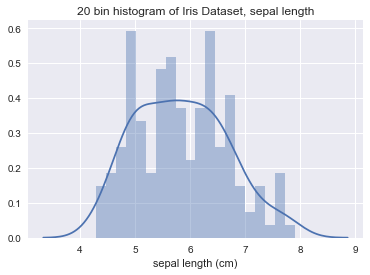

In [46]:
# 20 bin histogram
ax = sns.distplot(iris_df["sepal length (cm)"], bins=20)
ax.set_title("20 bin histogram of Iris Dataset, sepal length")
plt.show()

## 2-D Joint Plot

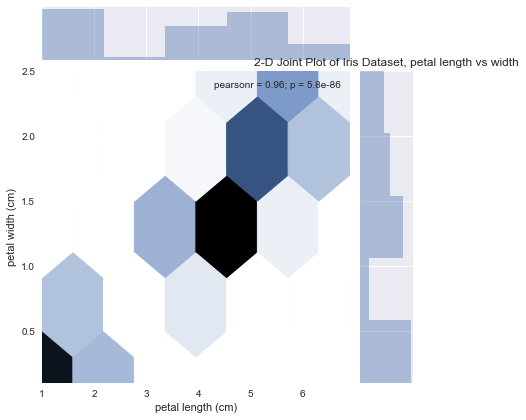

In [47]:
sns.jointplot("petal length (cm)", "petal width (cm)", iris_df[["petal length (cm)", "petal width (cm)"]], kind="hex")
plt.title("2-D Joint Plot of Iris Dataset, petal length vs width")
plt.show()

## Box Plot

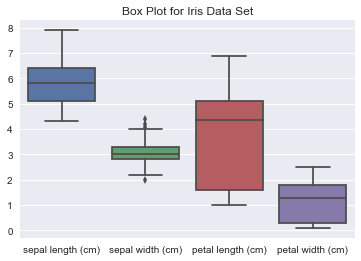

In [48]:
ax = sns.boxplot(data=iris_df)
plt.title("Box Plot for Iris Data Set")
plt.show()

## Pie Chart

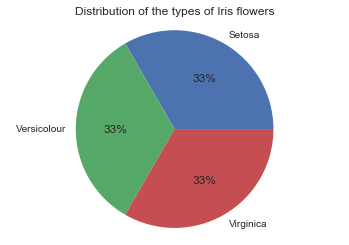

In [49]:
plt.title("Distribution of the types of Iris flowers")  # Add title to the top of the plot
plt.pie(np.bincount(target), labels=species, autopct='%.0f%%')
plt.axis('equal')
plt.show()

## Pair Plot

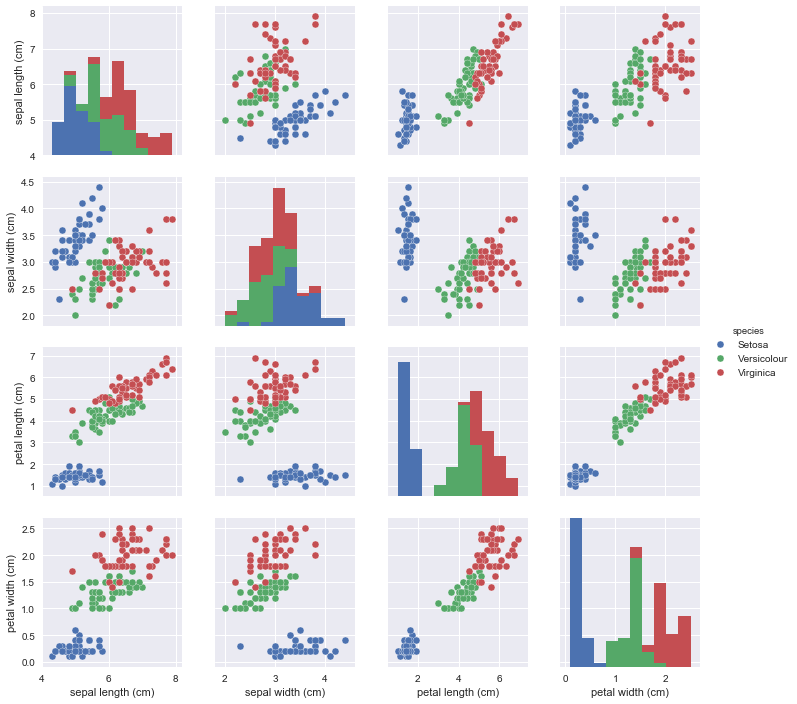

In [50]:
sns.pairplot(iris_df, hue='species', size=2.5)
plt.show()

## Empirical CDF

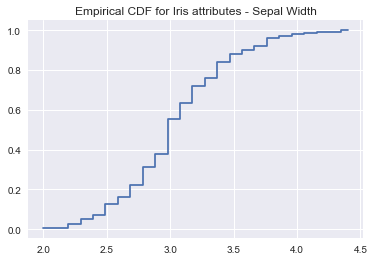

In [51]:
ecdf = sm.distributions.ECDF(iris_df["sepal width (cm)"])
x = np.linspace(iris_df["sepal width (cm)"].min(), iris_df["sepal width (cm)"].max())
y = ecdf(x)
plt.step(x, y)
plt.title("Empirical CDF for Iris attributes - Sepal Width")
plt.show()

## Percentile Plots

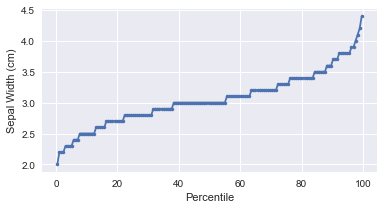

In [52]:
position, sepal_width = probscale.plot_pos(iris_df["sepal width (cm)"])
position *= 100
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(position, sepal_width, marker='.', label='Sepal Width')
ax.set_xlabel('Percentile')
ax.set_ylabel('Sepal Width (cm)')
plt.show()

## Parallel Coordinates

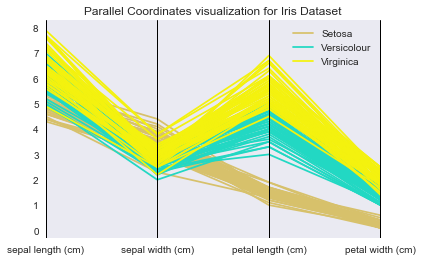

In [53]:
parallel_coordinates(iris_pair_df, "species")
plt.title('Parallel Coordinates visualization for Iris Dataset')
plt.show()

## Radviz

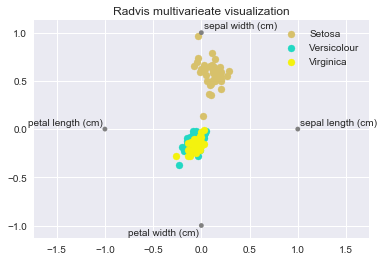

In [54]:
radviz(iris_pair_df, "species")
plt.title('Radvis multivarieate visualization')
plt.show()